In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Data loading

Load the data.

In [2]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

Check sizes.

In [3]:
X_train.shape

(59400, 40)

In [4]:
y_train.shape

(59400, 2)

Verify that `id` is the same across `X_train` and `y_train`.

In [5]:
np.all(X_train['id'] == y_train['id'])

True

Check whether `id` is unique.

In [5]:
np.any(X_train['id'].duplicated())

False

Merge `X_train` and `y_train`.

In [6]:
train = pd.merge(X_train, y_train, on='id')

Set `id` as index.

In [8]:
train.set_index('id', inplace=True)

In [7]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


Fix data type of `date_recorded`.

In [8]:
train['date_recorded'] = pd.to_datetime(train['date_recorded'])

# EDA

Check first row.

In [9]:
train.iloc[0,:]

id                                         69572
amount_tsh                                  6000
date_recorded                2011-03-14 00:00:00
funder                                     Roman
gps_height                                  1390
installer                                  Roman
longitude                                34.9381
latitude                                -9.85632
wpt_name                                    none
num_private                                    0
basin                                 Lake Nyasa
subvillage                              Mnyusi B
region                                    Iringa
region_code                                   11
district_code                                  5
lga                                       Ludewa
ward                                    Mundindi
population                                   109
public_meeting                              True
recorded_by              GeoData Consultants Ltd
scheme_management   

Check for missing values.

In [10]:
train.isnull().mean().sort_values(ascending=False)

scheme_name              0.474175
scheme_management        0.065269
installer                0.061532
funder                   0.061195
public_meeting           0.056128
permit                   0.051448
subvillage               0.006246
ward                     0.000000
lga                      0.000000
district_code            0.000000
region_code              0.000000
region                   0.000000
num_private              0.000000
basin                    0.000000
wpt_name                 0.000000
latitude                 0.000000
longitude                0.000000
gps_height               0.000000
date_recorded            0.000000
amount_tsh               0.000000
population               0.000000
status_group             0.000000
recorded_by              0.000000
water_quality            0.000000
waterpoint_type          0.000000
source_class             0.000000
source_type              0.000000
source                   0.000000
quantity_group           0.000000
quantity      

## `amount_tsh`

In [11]:
train['amount_tsh'].describe()

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

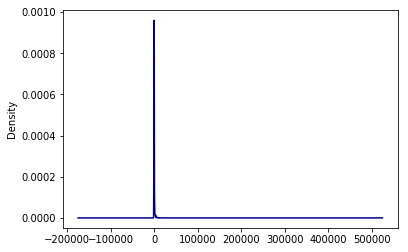

In [12]:
train['amount_tsh'].plot.density(color='darkblue')

How many zeros?

In [13]:
np.mean(train['amount_tsh'] < 1e-6)

0.700993265993266

What does the distribution of non-zero values look like?

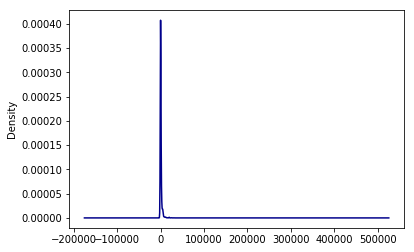

In [14]:
train[train['amount_tsh'] > 0]['amount_tsh'].plot.density(color='darkblue')

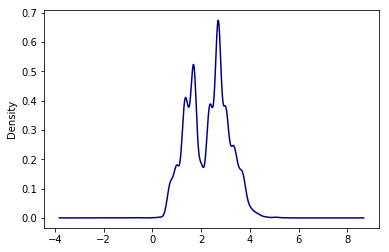

In [15]:
np.log10(train[train['amount_tsh'] > 0]['amount_tsh']).plot.density(color='darkblue')

Create an indicator for `amount_tsh` equal to zero, and log-transform the variable.

In [31]:
train['amount_tsh_is_zero'] = train['amount_tsh'] < 1e-6
train['amount_tsh'] = np.log10(train['amount_tsh'] + 1)

## `date_recorded`

In [189]:
train['date_recorded'].describe()

count                   59400
unique                    356
top       2011-03-15 00:00:00
freq                      572
first     2002-10-14 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

In [190]:
train.set_index('date_recorded').resample('Y').size()

date_recorded
2002-12-31        1
2003-12-31        0
2004-12-31       30
2005-12-31        0
2006-12-31        0
2007-12-31        0
2008-12-31        0
2009-12-31        0
2010-12-31        0
2011-12-31    28674
2012-12-31     6424
2013-12-31    24271
Freq: A-DEC, dtype: int64

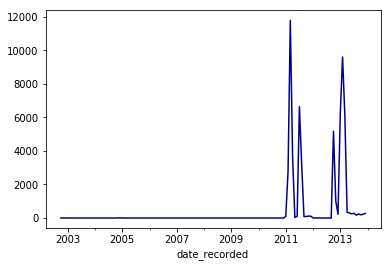

In [191]:
train.set_index('date_recorded').resample('M').size().plot.line(color='darkblue')

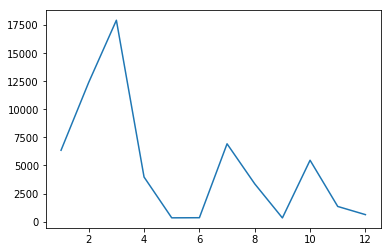

In [192]:
train['date_recorded'].dt.month.value_counts().sort_index().plot.line()

## `funder`

In [193]:
train['funder'].nunique()

1897

In [194]:
train['funder'].value_counts().head(10)

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Name: funder, dtype: int64

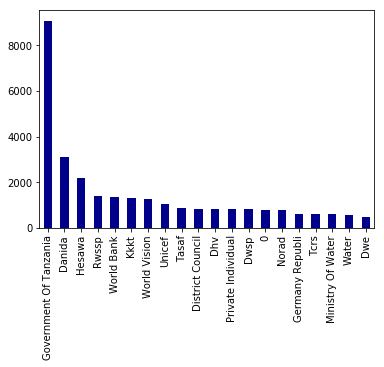

In [25]:
train['funder'].value_counts().head(20).plot.bar(color='darkblue')

Create a variable representing whether the waterpoint was funded by the government.

In [195]:
train['is_govt_funded'] = train['funder'] == 'Government Of Tanzania'

## `gps_height`

In [196]:
train['gps_height'].describe()

count    59400.000000
mean       668.297239
std        693.116350
min        -90.000000
25%          0.000000
50%        369.000000
75%       1319.250000
max       2770.000000
Name: gps_height, dtype: float64

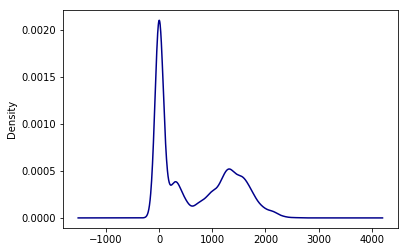

In [28]:
train['gps_height'].plot.density(color='darkblue')

How many zeros?

In [29]:
np.mean(np.abs(train['gps_height']) < 1e-6)

0.3440740740740741

How many negative values?

In [30]:
np.mean(train['gps_height'] < 0)

0.025185185185185185

What do negative values look like?

In [31]:
train['gps_height'].sort_values().head(10)

id
38774   -90
41857   -63
44724   -63
22837   -59
56147   -57
16026   -55
53930   -54
27293   -53
64309   -52
49097   -52
Name: gps_height, dtype: int64

## `installer`

In [32]:
train['installer'].nunique()

2145

In [33]:
train['installer'].value_counts().head(10)

DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
Name: installer, dtype: int64

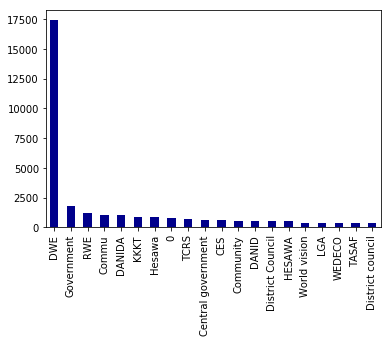

In [34]:
train['installer'].value_counts().head(20).plot.bar(color='darkblue')

## `longitude` and `latitude`

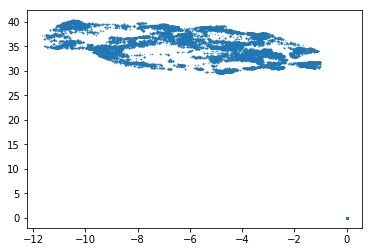

In [35]:
plt.scatter(x=train['latitude'], y=train['longitude'], s=0.2, alpha=0.5)

How many points with missing coordinates?

In [36]:
np.sum(train['longitude'] < 5)

1812

In [37]:
train[train['longitude'] < 5].head(10)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,amount_tsh_is_zero,is_govt_funded
id,,,,,,,,,,,,,,,,,,,,,
6091,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,Lake Victoria,...,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump,functional,True,False
32376,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,0,Lake Victoria,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,True,True
72678,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,Lake Victoria,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,True,False
56725,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,Lake Victoria,...,enough,enough,shallow well,shallow well,groundwater,other,other,non functional,True,False
13042,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,0,Lake Victoria,...,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair,True,False
33500,0.0,2011-07-18,Hesawa,0,DWE,0.0,-2.000000e-08,Bombani,0,Lake Victoria,...,dry,dry,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,True,False
71487,0.0,2012-10-25,Ridep,0,DWE,0.0,-2.000000e-08,Nyanguruma,0,Lake Victoria,...,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,True,False
70379,0.0,2011-07-18,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Nersing College,0,Lake Victoria,...,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump,functional,True,True
59713,0.0,2011-07-30,Plan International,0,Plan Internationa,0.0,-2.000000e-08,Petro,0,Lake Victoria,...,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump,functional,True,False


Set `longitude` and `latitude` to missing for these observations.

In [38]:
train.loc[train['longitude'] < 5, ['longitude', 'latitude']] = None

## `wpt_name`

In [39]:
train['wpt_name'].nunique()

37400

In [40]:
train['wpt_name'].value_counts().head(10)

none               3563
Shuleni            1748
Zahanati            830
Msikitini           535
Kanisani            323
Bombani             271
Sokoni              260
Ofisini             254
School              208
Shule Ya Msingi     199
Name: wpt_name, dtype: int64

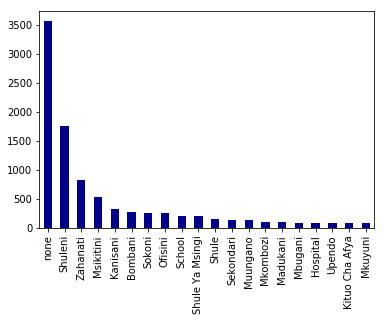

In [41]:
train['wpt_name'].value_counts().head(20).plot.bar(color='darkblue')

Convert "none" to missing.

In [42]:
train.loc[train['wpt_name'] == 'none', 'wpt_name'] = None

## `num_private`

In [43]:
train['num_private'].describe()

count    59400.000000
mean         0.474141
std         12.236230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1776.000000
Name: num_private, dtype: float64

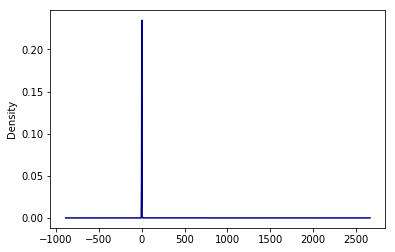

In [44]:
train['num_private'].plot.density(color='darkblue')

How many zeros?

In [45]:
np.mean(train['num_private'] == 0)

0.9872558922558923

What does the distribution of non-zero values look like?

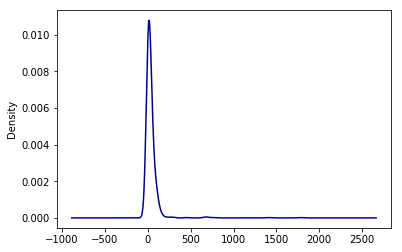

In [46]:
train[train['num_private'] > 0]['num_private'].plot.density(color='darkblue')

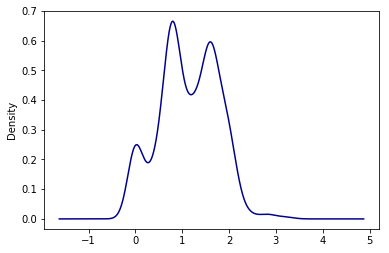

In [47]:
np.log10(train[train['num_private'] > 0]['num_private']).plot.density(color='darkblue')

Create an indicator for `num_private` equal to zero, and log-transform the variable.

In [48]:
train['num_private_is_zero'] = train['num_private'] == 0
train['num_private'] = np.log10(train['num_private'] + 1)

## `basin`

In [49]:
train['basin'].nunique()

9

In [50]:
train['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

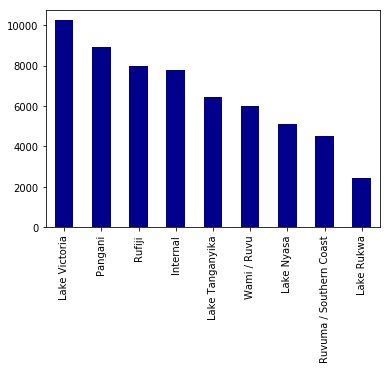

In [51]:
train['basin'].value_counts().plot.bar(color='darkblue')

## `subvillage`

In [52]:
train['subvillage'].nunique()

19287

In [53]:
train['subvillage'].value_counts().head(10)

Madukani    508
Shuleni     506
Majengo     502
Kati        373
Mtakuja     262
Sokoni      232
M           187
Muungano    172
Mbuyuni     164
Mlimani     152
Name: subvillage, dtype: int64

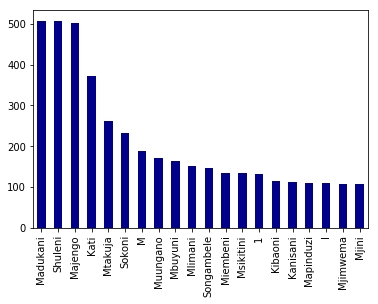

In [54]:
train['subvillage'].value_counts().head(20).plot.bar(color='darkblue')

## `region`, `region_code` and `district_code`

In [55]:
train['region'].nunique()

21

In [56]:
train['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

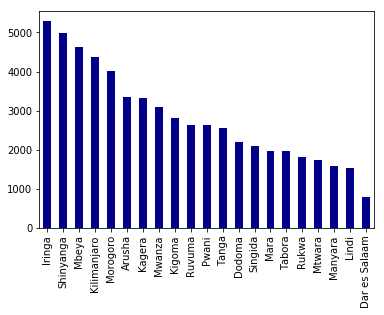

In [57]:
train['region'].value_counts().plot.bar(color='darkblue')

In [58]:
train['region_code'].nunique()

27

In [59]:
train['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

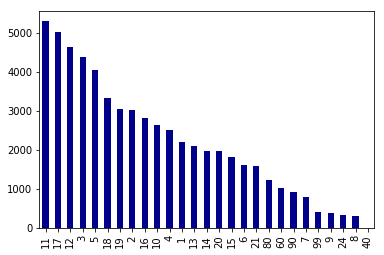

In [60]:
train['region_code'].value_counts().plot.bar(color='darkblue')

In [61]:
train['district_code'].nunique()

20

In [62]:
train['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

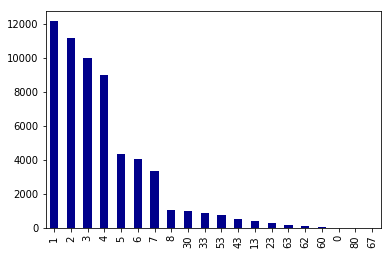

In [63]:
train['district_code'].value_counts().plot.bar(color='darkblue')

Is there a one-to-one relationship between `region` and `region_code`?

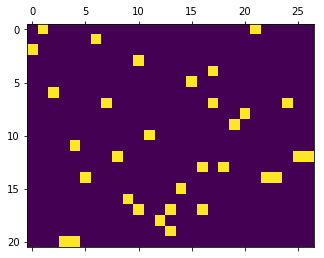

In [64]:
plt.matshow(pd.crosstab(train['region'], train['region_code']) > 0)

In [65]:
train.groupby('region')['region_code'].unique()

region
Arusha                [2, 24]
Dar es Salaam             [7]
Dodoma                    [1]
Iringa                   [11]
Kagera                   [18]
Kigoma                   [16]
Kilimanjaro               [3]
Lindi             [80, 18, 8]
Manyara                  [21]
Mara                     [20]
Mbeya                    [12]
Morogoro                  [5]
Mtwara            [90, 99, 9]
Mwanza               [19, 17]
Pwani             [60, 6, 40]
Rukwa                    [15]
Ruvuma                   [10]
Shinyanga        [17, 14, 11]
Singida                  [13]
Tabora                   [14]
Tanga                  [4, 5]
Name: region_code, dtype: object

In [66]:
train.groupby('region_code')['region'].unique()

region_code
1                [Dodoma]
2                [Arusha]
3           [Kilimanjaro]
4                 [Tanga]
5       [Morogoro, Tanga]
6                 [Pwani]
7         [Dar es Salaam]
8                 [Lindi]
9                [Mtwara]
10               [Ruvuma]
11    [Iringa, Shinyanga]
12                [Mbeya]
13              [Singida]
14    [Tabora, Shinyanga]
15                [Rukwa]
16               [Kigoma]
17    [Shinyanga, Mwanza]
18        [Kagera, Lindi]
19               [Mwanza]
20                 [Mara]
21              [Manyara]
24               [Arusha]
40                [Pwani]
60                [Pwani]
80                [Lindi]
90               [Mtwara]
99               [Mtwara]
Name: region, dtype: object

What's the relationship with `district_code`?

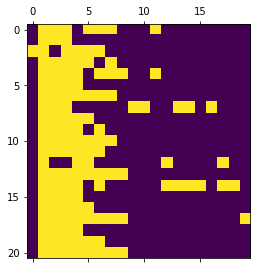

In [67]:
plt.matshow(pd.crosstab(train['region'], train['district_code']) > 0)

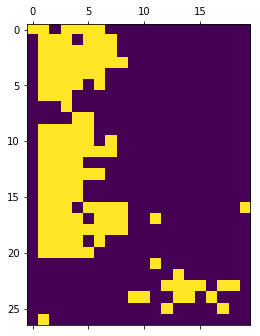

In [68]:
plt.matshow(pd.crosstab(train['region_code'], train['district_code']) > 0)

## `lga`

In [69]:
train['lga'].nunique()

125

In [70]:
train['lga'].value_counts().head(10)

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
Kilosa          1094
Kasulu          1047
Mbozi           1034
Meru            1009
Bagamoyo         997
Name: lga, dtype: int64

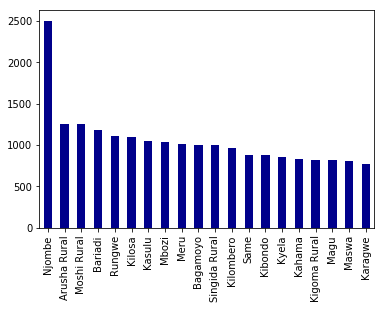

In [71]:
train['lga'].value_counts().head(20).plot.bar(color='darkblue')

## `ward`

In [72]:
train['ward'].nunique()

2092

In [73]:
train['ward'].value_counts().head(10)

Igosi           307
Imalinyi        252
Siha Kati       232
Mdandu          231
Nduruma         217
Kitunda         203
Mishamo         203
Msindo          201
Chalinze        196
Maji ya Chai    190
Name: ward, dtype: int64

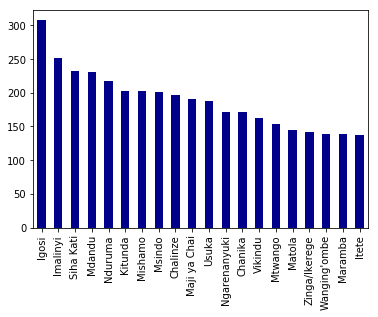

In [74]:
train['ward'].value_counts().head(20).plot.bar(color='darkblue')

## `population`

In [75]:
train['population'].describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

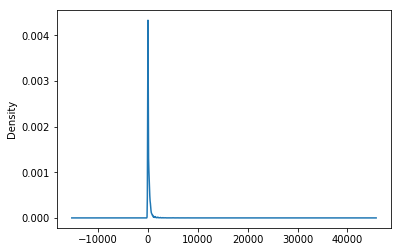

In [76]:
train['population'].plot.density()

How many zeros?

In [77]:
np.mean(train['population'] == 0)

0.35994949494949496

How many ones?

In [78]:
np.mean(train['population'] == 1)

0.11826599326599327

Where are the zeros and ones?

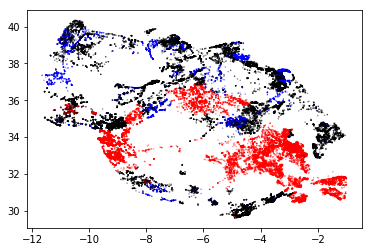

In [79]:
color = np.asarray(['red', 'blue', 'black'])[train['population'].clip_upper(2)]
plt.scatter(x=train['latitude'], y=train['longitude'], s=0.2, alpha=0.5, color=color)

What does the distribution of `population` excluding zeros and ones look like?

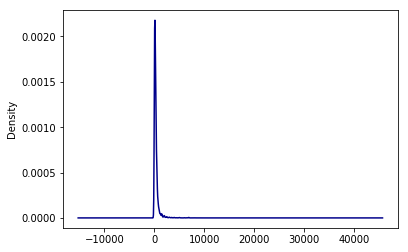

In [80]:
train[train['population'] > 1]['population'].plot.density(color='darkblue')

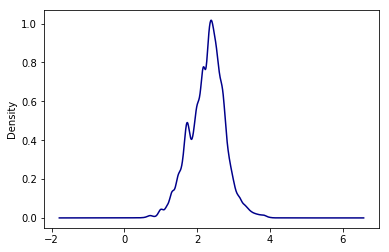

In [81]:
np.log10(train[train['population'] > 1]['population']).plot.density(color='darkblue')

Create indicators for `population` equal to zero or one, and log-transform the variable.

In [82]:
train['population_is_zero'] = train['population'] == 0
train['population_is_one'] = train['population'] == 1
train['population'] = np.log10(train['population'] + 1)

## `public_meeting`

In [83]:
train['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

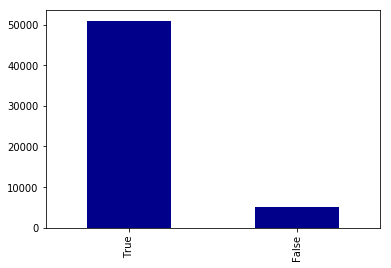

In [84]:
train['public_meeting'].value_counts().plot.bar(color='darkblue')

## `recorded_by`

In [85]:
train['recorded_by'].nunique()

1

In [86]:
train['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

Drop column.

In [87]:
train.drop(columns=['recorded_by'], inplace=True)

## `scheme_management`

In [88]:
train['scheme_management'].nunique()

12

In [89]:
train['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

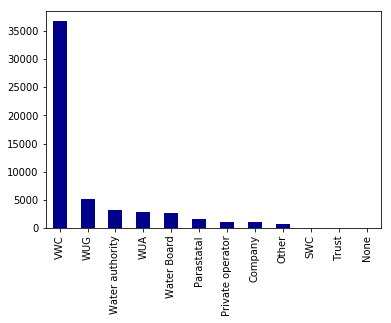

In [90]:
train['scheme_management'].value_counts().plot.bar(color='darkblue')

## `scheme_name`

In [91]:
train['scheme_name'].nunique()

2696

In [92]:
train['scheme_name'].value_counts().head(10)

K                              682
None                           644
Borehole                       546
Chalinze wate                  405
M                              400
DANIDA                         379
Government                     320
Ngana water supplied scheme    270
wanging'ombe water supply s    261
wanging'ombe supply scheme     234
Name: scheme_name, dtype: int64

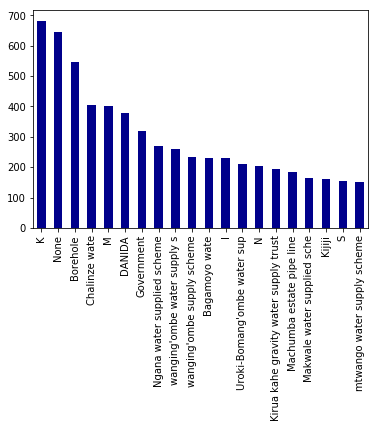

In [93]:
train['scheme_name'].value_counts().head(20).plot.bar(color='darkblue')

Convert "None" to missing.

In [94]:
train.loc[train['scheme_name'] == 'None', 'scheme_name'] = None

## `permit`

In [95]:
train['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

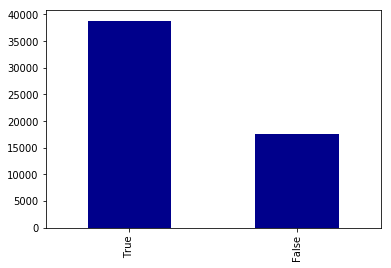

In [96]:
train['permit'].value_counts().plot.bar(color='darkblue')

## `construction_year`

In [97]:
train['construction_year'].describe()

count    59400.000000
mean      1300.652475
std        951.620547
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

In [98]:
train['construction_year'].value_counts().head(10)

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
Name: construction_year, dtype: int64

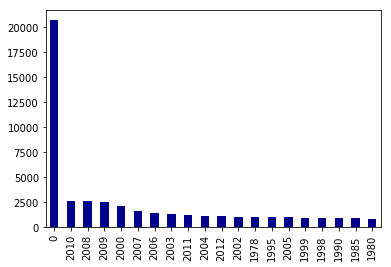

In [99]:
train['construction_year'].value_counts().head(20).plot.bar(color='darkblue')

Convert zeros to missing.

In [100]:
train.loc[train['construction_year'] == 0, 'construction_year'] = None

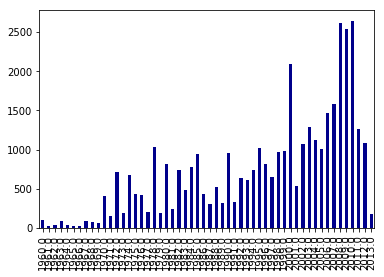

In [101]:
train['construction_year'].value_counts().sort_index().plot.bar(color='darkblue')

Define a new variable for the "age" of the waterpoint.

In [102]:
train['age'] = train['date_recorded'].dt.year - train['construction_year']

In [103]:
train['age'].describe()

count    38691.000000
mean        15.355742
std         12.492673
min         -7.000000
25%          5.000000
50%         13.000000
75%         25.000000
max         53.000000
Name: age, dtype: float64

How many negative values?

In [104]:
np.sum(train['age'] < 0)

9

In [105]:
train.loc[train['age'] < 0, ['date_recorded', 'construction_year', 'age']]

,date_recorded,construction_year,age
id,,,
20198,2004-05-01,2008.0,-4.0
55069,2004-12-01,2006.0,-2.0
48759,2004-06-01,2011.0,-7.0
20534,2004-03-01,2009.0,-5.0
53086,2004-01-07,2009.0,-5.0
9195,2004-03-01,2005.0,-1.0
5971,2004-03-01,2007.0,-3.0
15921,2004-03-06,2009.0,-5.0
1251,2004-12-01,2008.0,-4.0


Set `age` to zero for these observations.

In [106]:
train['age'].clip_lower(0, inplace=True)

## `extraction_type` and related variables

In [107]:
train['extraction_type'].nunique()

18

In [108]:
train['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

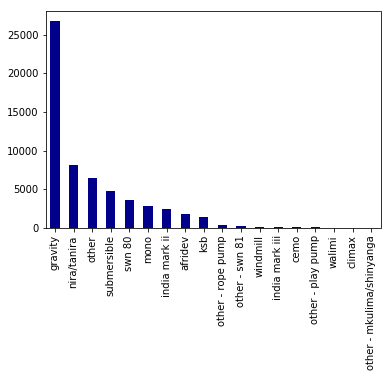

In [109]:
train['extraction_type'].value_counts().plot.bar(color='darkblue')

In [110]:
train['extraction_type_group'].nunique()

13

In [111]:
train['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

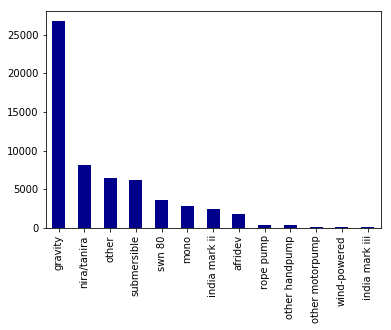

In [112]:
train['extraction_type_group'].value_counts().plot.bar(color='darkblue')

In [113]:
train['extraction_type_class'].nunique()

7

In [114]:
train['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

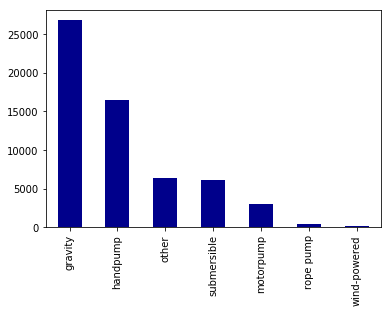

In [115]:
train['extraction_type_class'].value_counts().plot.bar(color='darkblue')

What are the relationships between these variables?

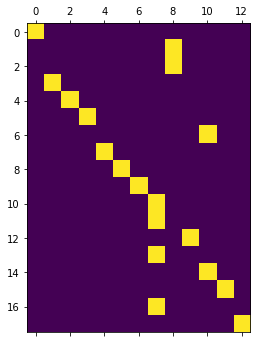

In [116]:
plt.matshow(pd.crosstab(train['extraction_type'], train['extraction_type_group']) > 0)

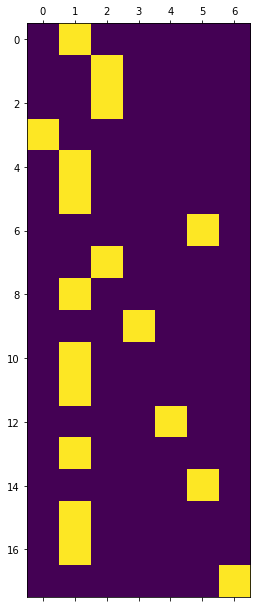

In [117]:
plt.matshow(pd.crosstab(train['extraction_type'], train['extraction_type_class']) > 0)

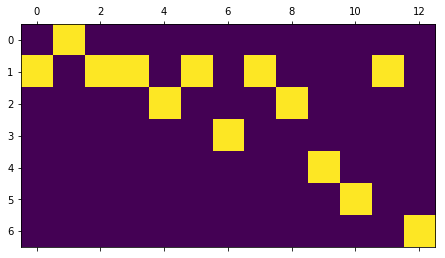

In [118]:
plt.matshow(pd.crosstab(train['extraction_type_class'], train['extraction_type_group']) > 0)

## `management` and `management_group`

In [119]:
train['management'].nunique()

12

In [120]:
train['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

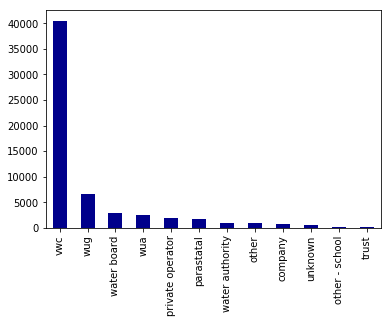

In [121]:
train['management'].value_counts().plot.bar(color='darkblue')

In [122]:
train['management_group'].nunique()

5

In [123]:
train['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

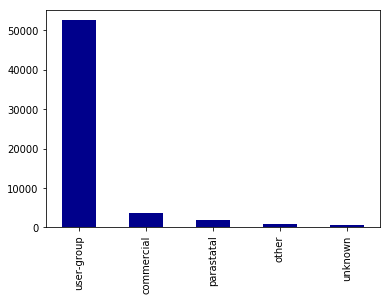

In [124]:
train['management_group'].value_counts().plot.bar(color='darkblue')

What's the relationship between `management` and `management_group`?

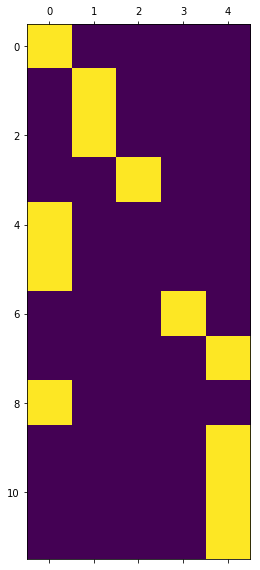

In [125]:
plt.matshow(pd.crosstab(train['management'], train['management_group']) > 0)

## `payment` and `payment_type`

In [126]:
train['payment'].nunique()

7

In [127]:
train['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

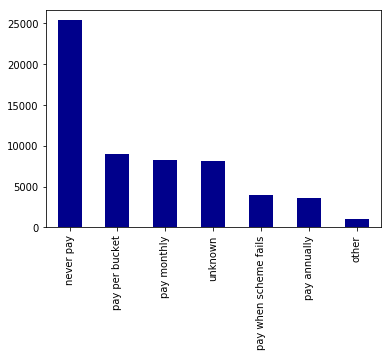

In [128]:
train['payment'].value_counts().plot.bar(color='darkblue')

In [129]:
train['payment_type'].nunique()

7

In [130]:
train['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

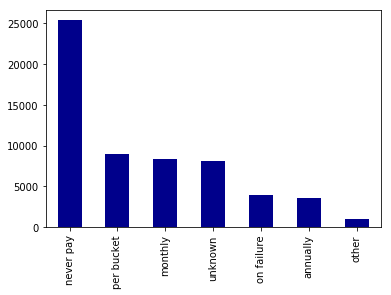

In [131]:
train['payment_type'].value_counts().plot.bar(color='darkblue')

Is it exactly the same variable?

In [132]:
np.all(train['payment'] == train['payment_type'])

False

In [133]:
train[train['payment'] != train['payment_type']][['payment', 'payment_type']].head()

,payment,payment_type
id,,
69572,pay annually,annually
34310,pay per bucket,per bucket
9944,pay per bucket,per bucket
50409,pay when scheme fails,on failure
50495,pay monthly,monthly


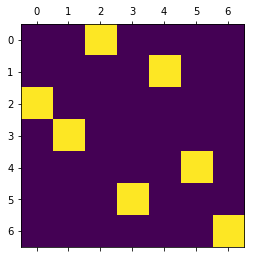

In [134]:
plt.matshow(pd.crosstab(train['payment'], train['payment_type']) > 0)

No, but it's effectively equivalent! Drop `payment`.

In [135]:
train.drop(columns=['payment'], inplace=True)

## `water_quality` and `quality_group`

In [136]:
train['water_quality'].nunique()

8

In [137]:
train['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

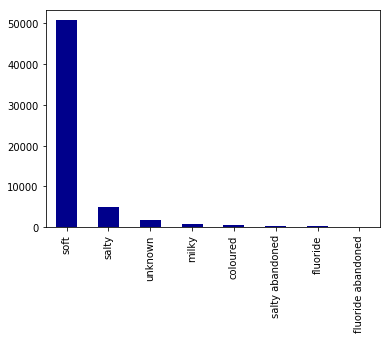

In [138]:
train['water_quality'].value_counts().plot.bar(color='darkblue')

In [139]:
train['quality_group'].nunique()

6

In [140]:
train['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

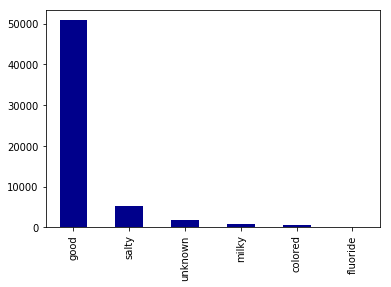

In [141]:
train['quality_group'].value_counts().plot.bar(color='darkblue')

What's the relationship between `water_quality` and `quality_group`?

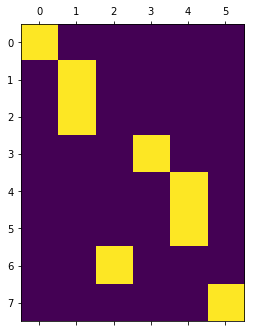

In [142]:
plt.matshow(pd.crosstab(train['water_quality'], train['quality_group']) > 0)

## `quantity` and `quantity_group`

In [143]:
train['quantity'].nunique()

5

In [144]:
train['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

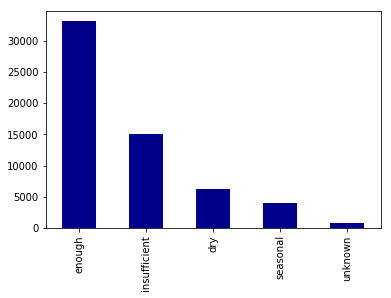

In [145]:
train['quantity'].value_counts().plot.bar(color='darkblue')

In [146]:
train['quantity_group'].nunique()

5

In [147]:
train['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

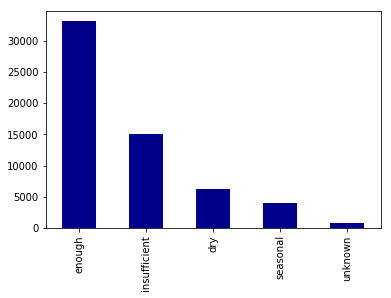

In [148]:
train['quantity_group'].value_counts().plot.bar(color='darkblue')

Is it exactly the same variable?

In [149]:
np.all(train['quantity'] == train['quantity_group'])

True

Yes! Drop `quantity_group`.

In [150]:
train.drop(columns=['quantity_group'], inplace=True)

## `source` and related variables

In [151]:
train['source'].nunique()

10

In [152]:
train['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

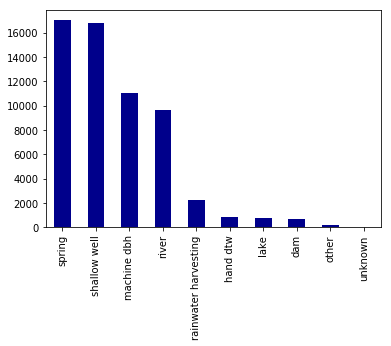

In [153]:
train['source'].value_counts().plot.bar(color='darkblue')

In [154]:
train['source_type'].nunique()

7

In [155]:
train['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

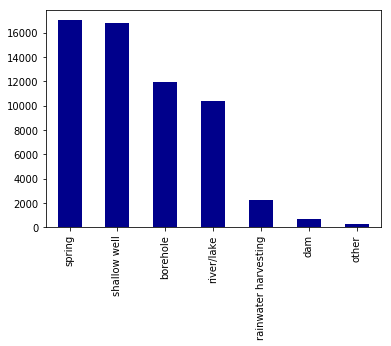

In [156]:
train['source_type'].value_counts().plot.bar(color='darkblue')

In [157]:
train['source_class'].nunique()

3

In [158]:
train['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

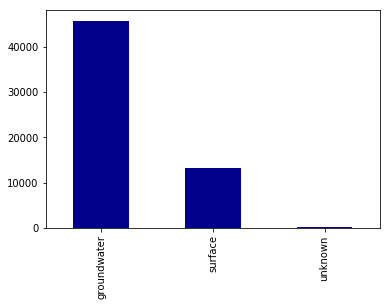

In [159]:
train['source_class'].value_counts().plot.bar(color='darkblue')

What are the relationships between these variables?

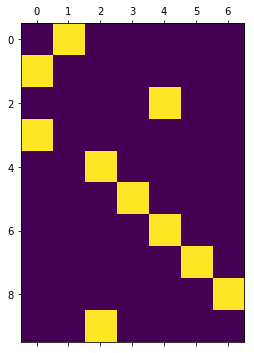

In [160]:
plt.matshow(pd.crosstab(train['source'], train['source_type']) > 0)

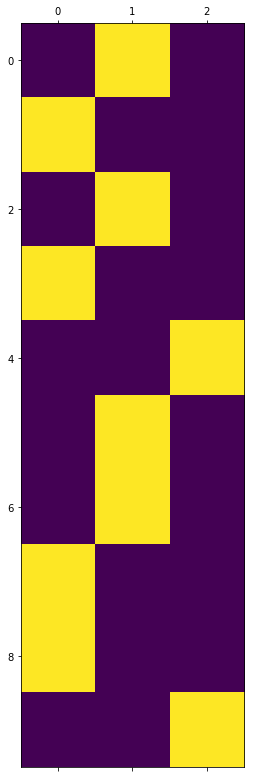

In [161]:
plt.matshow(pd.crosstab(train['source'], train['source_class']) > 0)

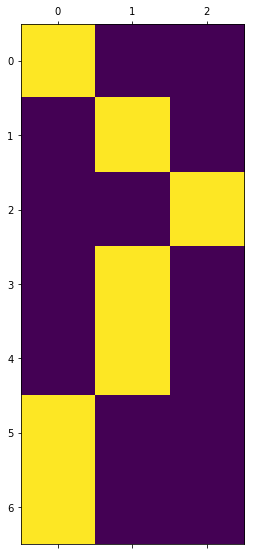

In [162]:
plt.matshow(pd.crosstab(train['source_type'], train['source_class']) > 0)

## `waterpoint_type` and `waterpoint_type_group`

In [163]:
train['waterpoint_type'].nunique()

7

In [164]:
train['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

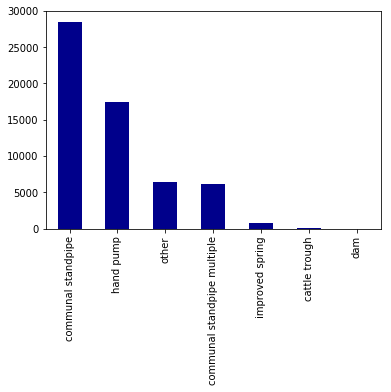

In [165]:
train['waterpoint_type'].value_counts().plot.bar(color='darkblue')

In [166]:
train['waterpoint_type_group'].nunique()

6

In [167]:
train['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

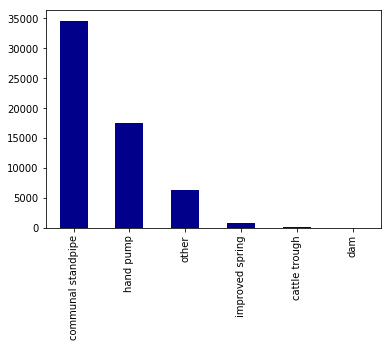

In [168]:
train['waterpoint_type_group'].value_counts().plot.bar(color='darkblue')

What's the relationship between `waterpoint_type` and `waterpoint_type_group`?

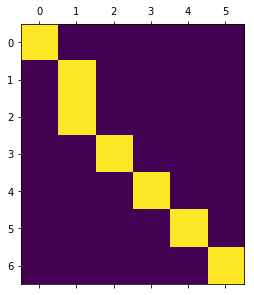

In [169]:
plt.matshow(pd.crosstab(train['waterpoint_type'], train['waterpoint_type_group']) > 0)

## `status_group`

In [170]:
train['status_group'].nunique()

3

In [171]:
train['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

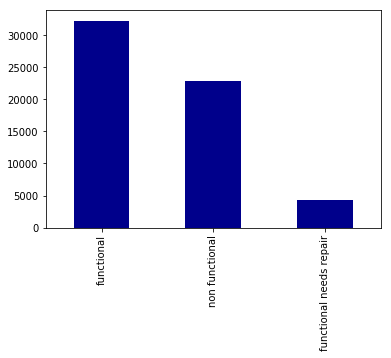

In [172]:
train['status_group'].value_counts().plot.bar(color='darkblue')